# Linear regression on salary survey in IT field in Bulgaria

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go

print("Pandas: ", pd.__version__)                       # 2.0.3
print("Numpy: ", np.__version__)                        # 1.24.3
print("Seaborn: ", sns.__version__)                     # 0.12.2
print("Matplotlib: ", plt.matplotlib.__version__)       # 3.7.2
print("Plotly: ", plotly.__version__)                   # 5.9.0

Pandas:  2.1.1
Numpy:  1.24.3
Seaborn:  0.12.2
Matplotlib:  3.8.0
Plotly:  5.9.0


## Import Data

The dataset was collected via a survey conducted by Dev.BG on the salaries of the IT field in Bulgaria.

In [2]:
df = pd.read_csv('./data/it_salaries_2023_bulgaria.csv')
df.head()

,Timestamp,"Стартова заплата на текущата позиция (месечна, нето, в лева)","Текуща заплата (месечна, нето, в лева)",Колко години стаж имате на текущата позиция?,Колко години стаж имате?,За колко човека отговаряте?,В коя област работите?,Какво е точното название на позицията Ви?,Град,Заплаща ли се Overtime,...,Фирмата изисква ли отчитане на часове за работния ден,"Фирмата предлага ли работно време по твое желание (изключвайки срещите)? ""Имаш да свършиш това за днес, пък кога го вършиш - е твоя работа",Получавате ли бонуси на база добре свършена работа,Тип на компанията,Има ли и какви стокови опции или подобни,Брой дни платен отпуск,Получавате ли допълнително здравно осигуряване,Получавате ли карта/бюджет за спорт,"Получавате ли бюджет за допълнителни обучения, курсове и сертификати",Бележки
0,1/18/2023 10:14:09,3800.0,5800,2.0,6.0,0,QA,Automation QA,София,Няма overtime,...,не,да,"не, бонусите са фиксирани",Продукт,Не,32.0,Да,Не,Да,NaN
1,1/18/2023 10:18:27,3000.0,9600,5.0,8.0,1,Разработка на софтуер (Dev),Senior Software Engineer,София,Не,...,не,да,"не, нямаме бонуси",Продукт,15к $ годишно,25.0,Да,Не,Да,NaN
2,1/18/2023 10:23:24,9000.0,9000,4.0,7.0,0,Разработка на софтуер (Dev),Fullstack developwer,София,Няма overtime,...,не,NaN,"не, нямаме бонуси",Продукт,NaN,25.0,Да,Да,Да,NaN
3,1/18/2023 10:25:12,3400.0,5000,2.0,7.0,2,QA,QA Engineer,София,Няма overtime,...,не,да,"не, бонусите са фиксирани",Сървис,Не,30.0,Да,Да,Да,NaN
4,1/18/2023 10:29:56,7500.0,10000,2.0,8.0,0,Разработка на софтуер (Dev),full stack .net developer,гр. Америка (100% remote),Няма overtime,...,да,да,"не, нямаме бонуси",Продукт,не,0.0,Не,Не,Не,Контрактор съм - часовете трябва да ги отчета ...


In [3]:
df.columns

Index(['Timestamp',
       'Стартова заплата на текущата позиция (месечна, нето, в лева)',
       'Текуща заплата (месечна, нето, в лева)',
       'Колко години стаж имате на текущата позиция?',
       'Колко години стаж имате?', 'За колко човека отговаряте?',
       'В коя област работите?', 'Какво е точното название на позицията Ви?',
       'Град', 'Заплаща ли се Overtime',
       'Годишен размер на паричните бонуси (Нето, в лева)',
       'Име на фирмата, в която работите', 'Какви технологии ползвате?',
       'Имаше ли съкращения във вашата фирма в резултат на кризата',
       'Получихте ли увеличение на заплатата, което да компенсира инфлацията в страната',
       'Предлага ли по принцип дистанционна работа фирмата Ви',
       'Фирмата изисква ли естимейти преди започване на таск',
       'Фирмата изисква ли отчитане на часове за работния ден',
       'Фирмата предлага ли работно време по твое желание (изключвайки срещите)? "Имаш да свършиш това за днес, пък кога го вършиш - е тв

## Prepare data

### Fix columns

#### Drop irrelevant columns

In [4]:
df = df.drop(columns=[
                    'Timestamp',
                    'Име на фирмата, в която работите', 
                    'Имаше ли съкращения във вашата фирма в резултат на кризата', 
                    'Получихте ли увеличение на заплатата, което да компенсира инфлацията в страната', 
                    'Фирмата изисква ли естимейти преди започване на таск', 
                    'Фирмата изисква ли отчитане на часове за работния ден', 
                    'Има ли и какви стокови опции или подобни', 
                    'Бележки', 
                    'Получавате ли допълнително здравно осигуряване', 
                    'Получавате ли карта/бюджет за спорт', 
                    'Получавате ли бюджет за допълнителни обучения, курсове и сертификати', 
                    'Град', 
                    'Заплаща ли се Overtime',
                    'Годишен размер на паричните бонуси (Нето, в лева)',
                    'Какви технологии ползвате?',
                    'Предлага ли по принцип дистанционна работа фирмата Ви',
                    'Фирмата предлага ли работно време по твое желание (изключвайки срещите)? "Имаш да свършиш това за днес, пък кога го вършиш - е твоя работа',
                    'Получавате ли бонуси на база добре свършена работа',
                    'Тип на компанията', 
                    'Брой дни платен отпуск',
                    'Какво е точното название на позицията Ви?'
                    ])



In [5]:
df.columns

Index(['Стартова заплата на текущата позиция (месечна, нето, в лева)',
       'Текуща заплата (месечна, нето, в лева)',
       'Колко години стаж имате на текущата позиция?',
       'Колко години стаж имате?', 'За колко човека отговаряте?',
       'В коя област работите?'],
      dtype='object')

#### Change column names to English

In [6]:
# start_salary
# curr_salary
# experience
# total_experience
# people_manage
# position

df.columns = ['start_salary', 'curr_salary', 'curr_exp', 'total_exp', 'people_managed', 'pos']
df

,start_salary,curr_salary,curr_exp,total_exp,people_managed,pos
0,3800.0,5800,2.0,6.0,0,QA
1,3000.0,9600,5.0,8.0,1,Разработка на софтуер (Dev)
2,9000.0,9000,4.0,7.0,0,Разработка на софтуер (Dev)
3,3400.0,5000,2.0,7.0,2,QA
4,7500.0,10000,2.0,8.0,0,Разработка на софтуер (Dev)
...,...,...,...,...,...,...
187,1000.0,2000,1.5,1.5,0,QA
188,2200.0,2200,0.0,2.0,0,Разработка на софтуер (Dev)
189,8900.0,9800,1.0,15.0,4,Мениджмънт/Тиим Лиид
190,1800.0,1800,0.0,2.0,0,Поддръжка на софтуер (Support)


In [7]:
df['pos'].unique()

array(['QA', 'Разработка на софтуер (Dev)', 'Software Engineer ',
       'DevOps', 'Поддръжка на софтуер (Support)', 'BI',
       'Мениджмънт/Тиим Лиид', 'Security', 'Hardware', 'copywriter',
       'All in one IT Specialist', 'обслужващ персонал - Лидл',
       'UI/UX Designer', 'Networking', 'Research', 'Dev, UI/UX', 'BA'],
      dtype=object)

#### Change cells values to English

In [8]:
pos_norm_dict = {
    'Разработка на софтуер (Dev)': 'Software Developer',
    'Поддръжка на софтуер (Support)': 'Software Support',
    'Мениджмънт/Тиим Лиид': 'Team Lead',
    'copywriter': 'Copywriter',
    'Dev, UI/UX': 'UI/UX Developer',
    'BI': 'Data Analytics',
    'BA': 'Business Analyst'
}

df['pos'] = df['pos'].replace(pos_norm_dict)

df['pos'].unique()

array(['QA', 'Software Developer', 'Software Engineer ', 'DevOps',
       'Software Support', 'Data Analytics', 'Team Lead', 'Security',
       'Hardware', 'Copywriter', 'All in one IT Specialist',
       'обслужващ персонал - Лидл', 'UI/UX Designer', 'Networking',
       'Research', 'UI/UX Developer', 'Business Analyst'], dtype=object)

### IQR Outliers Removal


A box and whisker plot is a convenient way to visually display the data distribution through their quartiles. The lines extending parallel from the boxes are used to indicate variability iutside the upper and lower quartiles. Outliers are sometimes plotted as individual dots that are in-line with whiskers. 
https://datavizcatalogue.com/methods/box_plot.html

In [9]:
salaries = df.copy()

In [10]:
fig = go.Figure()
fig.add_trace(go.Box(
    x=salaries['pos'], 
    y=salaries['start_salary'],
    name='Start salary',
    marker_color='red'
))
fig.add_trace(go.Box(
    x=salaries['pos'], 
    y=salaries['curr_salary'],
    name='Current salary',
    marker_color='green'
))

fig.update_layout(
    xaxis=dict(title='Position', zeroline=False),
    yaxis=dict(title='Salary (BGN, netto)', zeroline=False),
    boxmode='group'
)

fig.show()

From the following graph we can see that in the positions for Software Developer and Software Support the outliers are the most apparent.

In [11]:
# Plot current experience and total experience
fig = go.Figure()
fig.add_trace(go.Box(
    x=salaries['pos'], 
    y=salaries['curr_exp'],
    name='Experience current position',
    marker_color='orange'
))
fig.add_trace(go.Box(
    x=salaries['pos'], 
    y=salaries['total_exp'],
    name='Total experience',
    marker_color='blue'
))

fig.update_layout(
    xaxis=dict(title='Position', zeroline=False),
    yaxis=dict(title='Experience (years)', zeroline=False),
    boxmode='group'
)

fig.show()

Here we remove outliers from total/current experience and start/current salary.
When using IQR to remove outliers all points that lie outside the range defined by the quartiles +/- 1.5 * IQR.
 - The outlier formula 1.5 * IQR is a rule of thumb for identifying outliers
 - Nanpercentile forumula is used since there are some empty cells and it ignores the NaN values. 
 - IQR is done before filling the empty cells to ensure the data that is used to fill the empty cells is not affected by outliers.

In [12]:
salaries.describe()

,start_salary,curr_salary,curr_exp,total_exp,people_managed
count,184.000000,192.000000,185.000000,192.000000,192.000000
mean,4762.179348,6282.281250,2.757568,7.859896,2.213542
std,3408.649300,3731.638576,2.869810,5.581477,6.426485
min,500.000000,550.000000,0.000000,0.000000,0.000000
25%,2137.500000,4000.000000,1.000000,3.500000,0.000000
50%,4000.000000,5550.000000,2.000000,7.000000,0.000000
75%,6500.000000,8000.000000,4.000000,10.000000,2.000000
max,25000.000000,29000.000000,25.000000,30.000000,56.000000


In [13]:
# START SALARY
Q1 = np.nanpercentile(salaries['start_salary'], 25, method='midpoint')
Q3 = np.nanpercentile(salaries['start_salary'], 75, method='midpoint')
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# outlier removal happens here
salaries['start_salary'] = salaries.start_salary[(salaries.start_salary < upper_bound) & (salaries.start_salary > lower_bound)]

print('Q1 Start Salary:', Q1)
print('Q3 Start Salary:', Q3)
print('IQR Start Salary:', IQR)
print('UB Start Salary', upper_bound)
print('LB Start Salary', lower_bound)

# CURRENT SALARY
Q1 = np.nanpercentile(salaries['curr_salary'], 25, method='midpoint')
Q3 = np.nanpercentile(salaries['curr_salary'], 75, method='midpoint')
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# outlier removal happens here
salaries['curr_salary'] = salaries.curr_salary[(salaries.curr_salary < upper_bound) & (salaries.curr_salary > lower_bound)]

print('Q1 Current Salary:', Q1)
print('Q3 Current Salary:', Q3)
print('IQR Current Salary:', IQR)
print('UB Current Salary:', upper_bound)
print('LB Current Salary:', lower_bound)

# CURRENT EXPERIENCE
Q1 = np.nanpercentile(salaries['curr_exp'], 25, method='midpoint')
Q3 = np.nanpercentile(salaries['curr_exp'], 75, method='midpoint')
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# outlier removal happens here
salaries['curr_exp'] = salaries.curr_exp[(salaries.curr_exp < upper_bound) & (salaries.curr_exp > lower_bound)]

print('Q1 Current Experience:', Q1)
print('Q3 Current Experience:', Q3)
print('IQR Current Experience:', IQR)
print('UB Current Experience:', upper_bound)
print('LB Current Experience:', lower_bound)

# TOTAL EXPERIENCE
Q1 = np.nanpercentile(salaries['total_exp'], 25, method='midpoint')
Q3 = np.nanpercentile(salaries['total_exp'], 75, method='midpoint')
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# outlier removal happens here
salaries['total_exp'] = salaries.total_exp[(salaries.total_exp < upper_bound) & (salaries.total_exp > lower_bound)]

print('Q1 Total Experience:', Q1)
print('Q3 Total Experience:', Q3)
print('IQR Total Experience:', IQR)
print('UB Total Experience:', upper_bound)
print('LB Total Experience:', lower_bound)

# FIRST RUN
# Q1 Start Salary: 2125.0       
# Q3 Start Salary: 6500.0       
# IQR Start Salary: 4375.0      
# UB Start Salary 13062.5       
# LB Start Salary -4437.5       
# Q1 Current Salary: 4000.0     
# Q3 Current Salary: 8000.0     
# IQR Current Salary: 4000.0        
# UB Current Salary: 14000.0        
# LB Current Salary: -2000.0
# Q1 Current Experience: 1.0
# Q3 Current Experience: 4.0
# IQR Current Experience: 3.0
# UB Current Experience: 8.5
# LB Current Experience: -3.5
# Q1 Total Experience: 3.5
# Q3 Total Experience: 10.0
# IQR Total Experience: 6.5
# UB Total Experience: 19.75
# LB Total Experience: -6.25


#SECOND RUN inclusive
# Q1 Start Salary: 2100.0
# Q3 Start Salary: 6000.0
# IQR Start Salary: 3900.0
# UB Start Salary 11850.0
# LB Start Salary -3750.0
# Q1 Current Salary: 3900.0
# Q3 Current Salary: 7650.0
# IQR Current Salary: 3750.0
# UB Current Salary: 13275.0
# LB Current Salary: -1725.0
# Q1 Current Experience: 1.0
# Q3 Current Experience: 3.0
# IQR Current Experience: 2.0
# UB Current Experience: 6.0
# LB Current Experience: -2.0
# Q1 Total Experience: 3.5
# Q3 Total Experience: 10.0
# IQR Total Experience: 6.5
# UB Total Experience: 19.75
# LB Total Experience: -6.25

#THIRD RUN exclusive
# Q1 Start Salary: 2050.0
# Q3 Start Salary: 6000.0
# IQR Start Salary: 3950.0
# UB Start Salary 11925.0
# LB Start Salary -3875.0
# Q1 Current Salary: 3900.0
# Q3 Current Salary: 7650.0
# IQR Current Salary: 3750.0
# UB Current Salary: 13275.0
# LB Current Salary: -1725.0
# Q1 Current Experience: 1.0
# Q3 Current Experience: 3.0
# IQR Current Experience: 2.0
# UB Current Experience: 6.0
# LB Current Experience: -2.0
# Q1 Total Experience: 3.5
# Q3 Total Experience: 10.0
# IQR Total Experience: 6.5
# UB Total Experience: 19.75
# LB Total Experience: -6.25



salaries

Q1 Start Salary: 2125.0
Q3 Start Salary: 6500.0
IQR Start Salary: 4375.0
UB Start Salary 13062.5
LB Start Salary -4437.5
Q1 Current Salary: 4000.0
Q3 Current Salary: 8000.0
IQR Current Salary: 4000.0
UB Current Salary: 14000.0
LB Current Salary: -2000.0
Q1 Current Experience: 1.0
Q3 Current Experience: 4.0
IQR Current Experience: 3.0
UB Current Experience: 8.5
LB Current Experience: -3.5
Q1 Total Experience: 3.5
Q3 Total Experience: 10.0
IQR Total Experience: 6.5
UB Total Experience: 19.75
LB Total Experience: -6.25


,start_salary,curr_salary,curr_exp,total_exp,people_managed,pos
0,3800.0,5800.0,2.0,6.0,0,QA
1,3000.0,9600.0,5.0,8.0,1,Software Developer
2,9000.0,9000.0,4.0,7.0,0,Software Developer
3,3400.0,5000.0,2.0,7.0,2,QA
4,7500.0,10000.0,2.0,8.0,0,Software Developer
...,...,...,...,...,...,...
187,1000.0,2000.0,1.5,1.5,0,QA
188,2200.0,2200.0,0.0,2.0,0,Software Developer
189,8900.0,9800.0,1.0,15.0,4,Team Lead
190,1800.0,1800.0,0.0,2.0,0,Software Support


### Fix missing values

#### Check for missing values

In [14]:
pd.isnull(salaries)

,start_salary,curr_salary,curr_exp,total_exp,people_managed,pos
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
187,False,False,False,False,False,False
188,False,False,False,False,False,False
189,False,False,False,False,False,False
190,False,False,False,False,False,False


#### Show rows where there are missing values

In [15]:
num_missing = len(salaries[pd.isnull(salaries).any(axis=1)])

print("Rows with missing values:", num_missing)

salaries[pd.isnull(salaries).any(axis=1)]

Rows with missing values: 31


,start_salary,curr_salary,curr_exp,total_exp,people_managed,pos
7,550.0,550.0,NaN,0.0,0,QA
13,NaN,5200.0,NaN,4.0,0,Software Developer
20,NaN,6500.0,5.0,15.0,5,Data Analytics
26,9500.0,NaN,4.0,10.0,2,Software Developer
34,3000.0,3750.0,1.0,NaN,0,Software Developer
37,12000.0,NaN,8.0,15.0,6,Team Lead
42,9000.0,10000.0,2.0,NaN,2,Software Developer
49,NaN,3000.0,NaN,1.0,0,Software Developer
57,10000.0,NaN,NaN,NaN,56,Software Developer
63,10000.0,11000.0,2.0,NaN,5,Team Lead


There are some missing values.
Some of them are a result of removing the outliers.
In order to improve accuracy of the data, the cells from start_salary and curr_exp will be filled with the median of all values.
Additionally, all faulty cells will be filtered. 
 - Total experience has to be more or equal to experience on current position. 
 - Salary at current position usually is not less than starting salary. 
 - Neither of them can be negative values.
 - People managed can't be negative. 

#### Filter faulty cells

In [16]:
salaries_filtered = salaries.copy()

#  look more in depth in the data and the cells removed
salaries_filtered = salaries[(salaries.curr_exp <= salaries.total_exp) & (salaries.curr_salary != 0) & (salaries.start_salary != 0) & (salaries.start_salary <= salaries.curr_salary)]

# df without faulty cells
salaries_filtered

,start_salary,curr_salary,curr_exp,total_exp,people_managed,pos
0,3800.0,5800.0,2.0,6.0,0,QA
1,3000.0,9600.0,5.0,8.0,1,Software Developer
2,9000.0,9000.0,4.0,7.0,0,Software Developer
3,3400.0,5000.0,2.0,7.0,2,QA
4,7500.0,10000.0,2.0,8.0,0,Software Developer
...,...,...,...,...,...,...
187,1000.0,2000.0,1.5,1.5,0,QA
188,2200.0,2200.0,0.0,2.0,0,Software Developer
189,8900.0,9800.0,1.0,15.0,4,Team Lead
190,1800.0,1800.0,0.0,2.0,0,Software Support


#### Calculate median and fill empty cells

In [17]:
start_salary_mean = salaries_filtered.start_salary.mean()
curr_exp_mean = salaries_filtered.curr_exp.mean()

print("Mean start salary:", start_salary_mean)
print("Mean current experience:", curr_exp_mean)

Mean start salary: 4520.56875
Mean current experience: 2.1931249999999998


In [18]:
# salaries_filtered.start_salary = salaries_filtered.start_salary.fillna(start_salary_mean)
# salaries_filtered.curr_exp = salaries_filtered.curr_exp.fillna(curr_exp_mean)

##### Show rows where there are missing values and we can see there are no more missing values

In [19]:
num_missing = len(salaries_filtered[pd.isnull(salaries_filtered).any(axis=1)])
print("Number of missing values:", num_missing)

Number of missing values: 0


### One hot encoding

One hot encoding represents each category (job position) as a binary vector. The category is converted to a binary vector where all elements are zero except the index that is marked with a 1. It is suitable for data where the order of categories is not important. Compared to Label encoding where the category is mapped to a continuous number starting from 0 or 1, making the order important.


In [20]:
salaries_dummies = pd.get_dummies(salaries_filtered.pos)
salaries_merged = pd.concat([salaries_filtered, salaries_dummies], axis = 1)
salaries_merged.head()

salaries_encoded = salaries_merged.drop(['pos'], axis=1)
salaries_encoded

,start_salary,curr_salary,curr_exp,total_exp,people_managed,All in one IT Specialist,Business Analyst,Copywriter,DevOps,Hardware,Networking,QA,Research,Security,Software Developer,Software Engineer,Software Support,Team Lead,UI/UX Designer
0,3800.0,5800.0,2.0,6.0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,3000.0,9600.0,5.0,8.0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,9000.0,9000.0,4.0,7.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,3400.0,5000.0,2.0,7.0,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,7500.0,10000.0,2.0,8.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1000.0,2000.0,1.5,1.5,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
188,2200.0,2200.0,0.0,2.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
189,8900.0,9800.0,1.0,15.0,4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
190,1800.0,1800.0,0.0,2.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False


## Visualize data

### Plotting relations between columns

#### Relationship between Total Experience and Current Salary

Text(0.5, 1.0, 'Relationship between Total Experience and Current Salary')

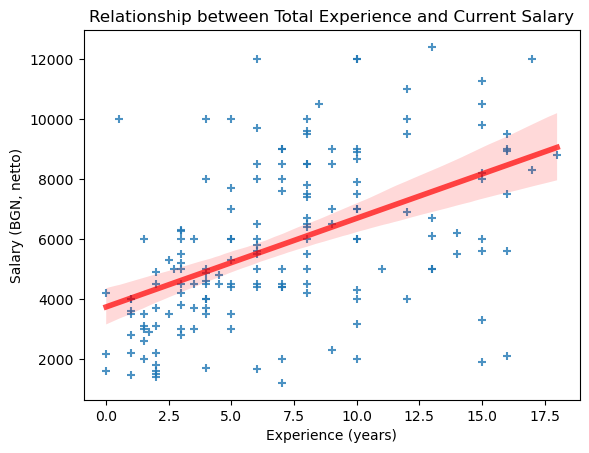

In [21]:
sns.regplot(x=salaries_encoded.total_exp, 
            y=salaries_encoded.curr_salary, 
            line_kws={"color":"r","alpha":0.7,"lw":4}, 
            marker='+')

plt.xlabel('Experience (years)')
plt.ylabel('Salary (BGN, netto)')
plt.title('Relationship between Total Experience and Current Salary')

 - Salary tends to increase with Total experience 

#### Relationship between Current Experience and Current Salary

Text(0.5, 1.0, 'Relationship between Current Experience and Current Salary')

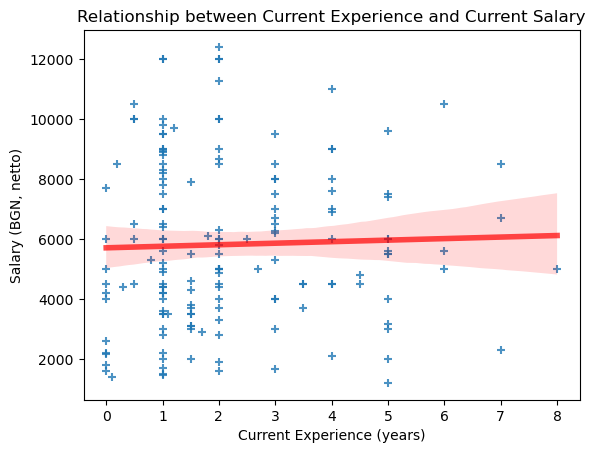

In [22]:
sns.regplot(x=salaries_encoded.curr_exp, 
            y=salaries_encoded.curr_salary, 
            line_kws={"color":"r","alpha":0.7,"lw":4}, 
            marker='+')

plt.xlabel('Current Experience (years)')
plt.ylabel('Salary (BGN, netto)')
plt.title('Relationship between Current Experience and Current Salary')
# distinguish positions

 - Salary does not tend to increase much by gaining experience on current work place

#### Correlation heatmap

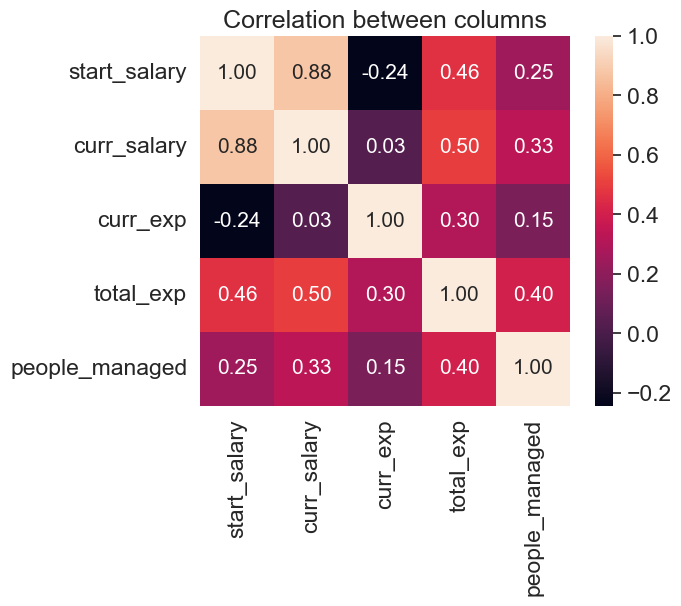

In [23]:
cols = ['start_salary', 'curr_salary', 'curr_exp', 'total_exp', 'people_managed']
cm = np.corrcoef(salaries_encoded[cols].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.title('Correlation between columns')
plt.show()

 - Total Experience has a positive correlation with the Start Salary and Current Salary
 - Current Experience has a negative correlation with the Start Salary (as we saw earlier the salary tends to increase with experience)
 - People Managed has a positive correlation with the Total Experience

## Train Model

### Split dataset

In [24]:
# Get dataset columns
len(salaries_encoded.columns)

19

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        salaries_encoded[['start_salary', 'curr_exp', 'total_exp',
            'people_managed', 'All in one IT Specialist', 'Business Analyst',
            'Copywriter', 'DevOps', 'Hardware', 'Networking', 'QA', 'Research',
            'Security', 'Software Developer', 'Software Engineer ',
            'Software Support', 'Team Lead', 'UI/UX Designer']].values,
        salaries_encoded.curr_salary.values,
        test_size=0.3,
        random_state=42
    )


### Fit model

In [26]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

#### Predict using model

Make predictions using the train and test datasets. Will be used for evaluation.

In [27]:
# Predict using train features
y_train_pred = regression.predict(X_train)

# Predict using test features
y_test_pred = regression.predict(X_test)

#### Slope and intercept

 - Slope (coefficient) - change in target variable for a one-unit change in the feature
 - Intercept - value of target variable when feature is 0

In [28]:
regression.coef_

array([ 9.25490321e-01,  4.24188170e+02, -2.34235334e+01,  1.54408444e+01,
        3.46117226e+01,  4.01964098e+00, -1.72621930e+03, -1.01097837e+02,
        7.56117412e+02, -3.99207813e+02,  1.54237672e+02,  5.68434189e-14,
       -5.68434189e-14,  4.29870780e+02, -7.28216549e+01, -2.05932455e+02,
        1.12642183e+03,  0.00000000e+00])

In [29]:
regression.intercept_

413.9489918665822

#### Manually test

In [30]:
            # 'start_salary', 'curr_exp', 'total_exp', 'people_managed', 'All in one IT Specialist',
            # 'Business Analyst', 'Copywriter', 'DevOps', 'Hardware', 'Networking', 
            # 'QA', 'Research', 'Security', 'Software Developer', 'Software Engineer ',
            # 'Software Support', 'Team Lead', 'UI/UX Designer'
manual_prediction = regression.predict([[
                    2000, 1, 2, 0, 0, 
                    0, 0, 0, 0, 0, 
                    0, 0, 0, 0, 1,
                    0, 0, 0
                    ]])

print('Predicted current salary as a Software Engineer with 2000 BGN starting salary, \n1 year experience at current position and 2 years of total experience:\n%.2f BGN' % manual_prediction )
# investigate new models

Predicted current salary as a Software Engineer with 2000 BGN starting salary, 
1 year experience at current position and 2 years of total experience:
2569.45 BGN


## Evaluate Model

### Mean Squared Error

In [31]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('MSE Train: ', mse_train)
print('MSE Test: ', mse_test)

MSE Train:  1014617.8131885986
MSE Test:  1351767.3339991868


Mean squared error is such a high number because the predicted values are in the thousands (salary).

### R2 Score

In [32]:
r2_score = regression.score(X_test, y_test)
print('R^2 Score: ', r2_score)

R^2 Score:  0.7784895806637957


I think to increase the score, i can reduce the job positions or collect more data samples with the current ones. Since now it is more biased towards Software Development and Engineering.

### Plot results

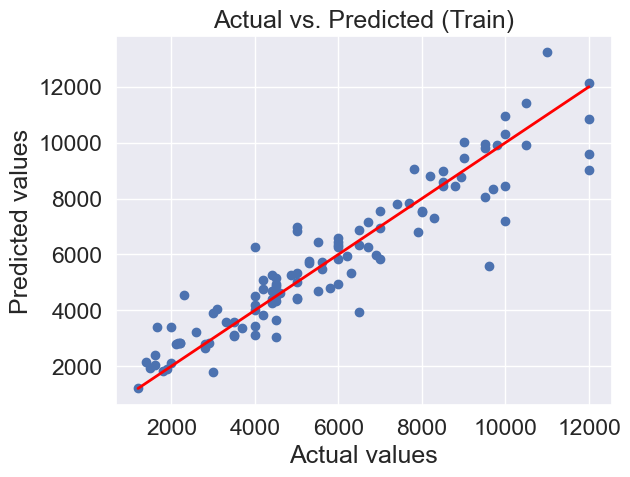

In [33]:
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='-', color='red', linewidth=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted (Train)')
plt.show()

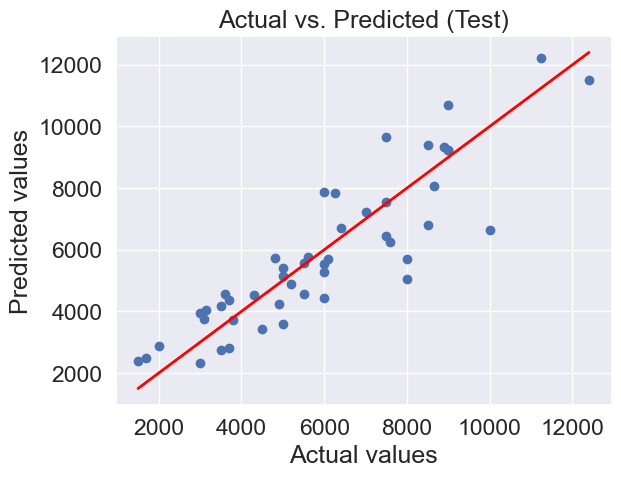

In [34]:
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted (Test)')
plt.show()

## Export Model

In [340]:
import pickle
with open('salaries_prediction_model', 'wb') as file:
    pickle.dump(regression, file)